In [48]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

In [49]:
N = 20
s = np.random.normal(0,1,(N,N))
dps = np.copy(s)

<IPython.core.display.Javascript object>


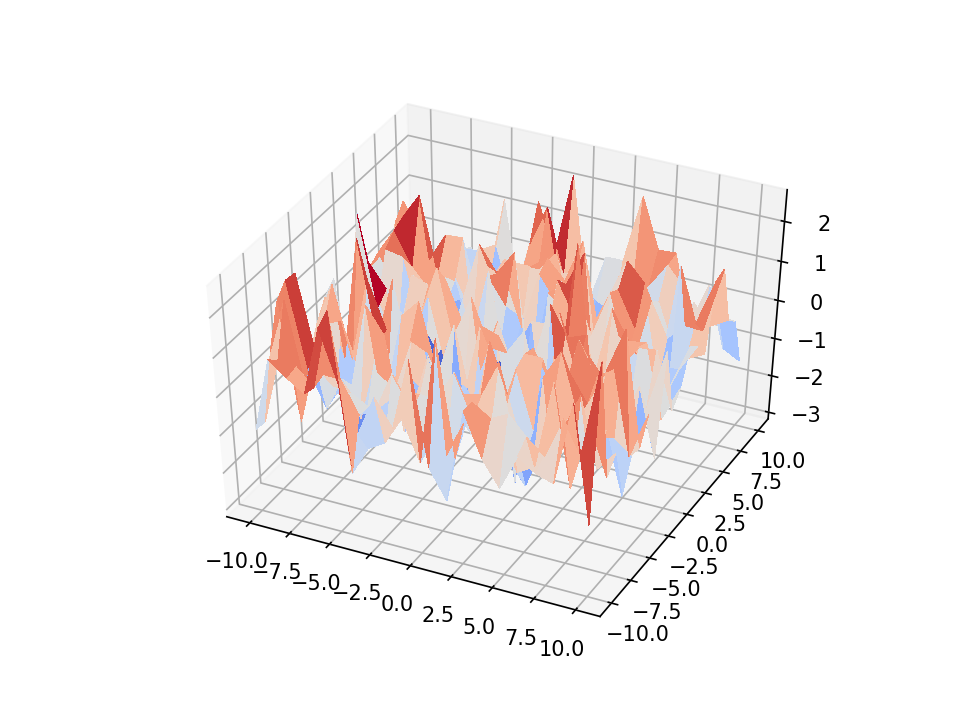

In [50]:
%matplotlib notebook
def printS(s):
    x = np.linspace(-10,10,N)
    y = np.linspace(-10,10,N)
    x, y = np.meshgrid(x, y)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(x,y,s,cmap=cm.coolwarm,linewidth=0, antialiased=False)
    plt.show()
printS(s)

<IPython.core.display.Javascript object>


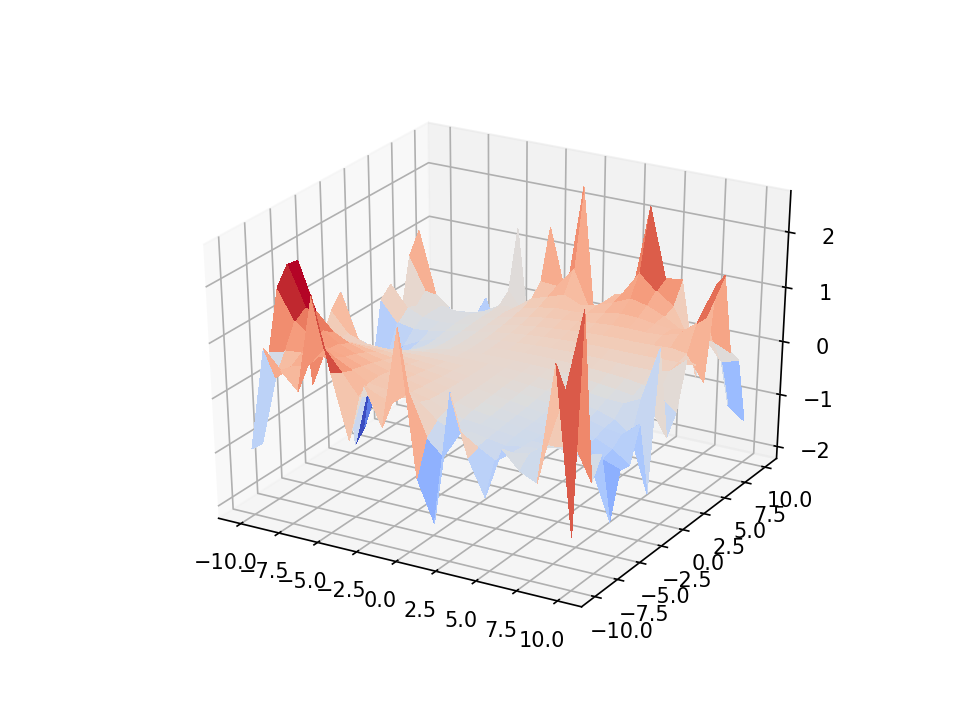

In [61]:
def DPupdate(s):
    r = np.copy(s)
    for i in range(1, N-1):
        for j in range(1, N-1):
            r[i,j] = (s[i+1,j] + s[i-1,j] + s[i,j+1] + s[i,j-1]) / 4
    return r
for _ in range(200):
    dps = DPupdate(dps)
printS(dps)


In [52]:
def update(s,_x,_y,M):
    r = 0.0
    for i in range(M):
        x, y = _x, _y
        while True:
            c = np.random.randint(4)
            if c == 0:
                x += 1
            elif c == 1:
                x -= 1
            elif c == 2:
                y += 1
            else:
                y -= 1
            if x == 0 or y == 0 or x == N - 1 or y == N - 1:
                r += s[x,y]
                break
    return r / M
def updateAll(s, M):
    global T
    r = np.copy(s)
    for i in range(1,N-1):
        for j in range(1,N-1):
            r[i,j] = update(s,i,j,M)
    s = T / (T + M) * s + M / (T + M) * r
    T += M
    return s
T = 0

1800: 6.063749389102973
1900: 5.983036903734684
2000: 5.919951300076669
2100: 5.76030151747774
2200: 5.800827640916654
2300: 5.686088993249514
2400: 5.511176015148434
2500: 5.3442588412985055
2600: 5.215471104180284
2700: 5.099088858690441


<IPython.core.display.Javascript object>


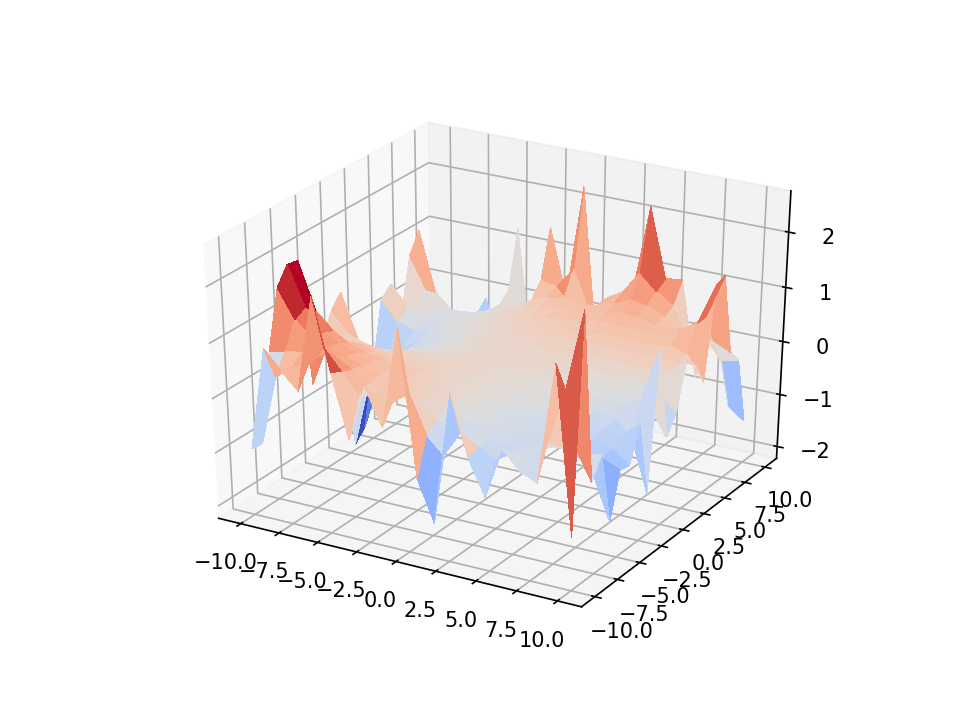

In [70]:
for i in range(10):
    s = updateAll(s, 100)
    print(str(T) + ": " + str(np.sum(np.abs(s-dps))))
printS(s)


15.616353438781161
